<a href="https://colab.research.google.com/github/aqsa-isha/Encryptix-Titanic-Survival-Prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Describe the dataset
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
# Check for null values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'] = df['Cabin'].fillna('Unknown')

<ipython-input-7-3e172bc70c79>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'] = df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-7-3e172bc70c79>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [8]:
# Removing outliers
#We noticed from above that 75% to max is large in age and fare
# Use quartiles to detect outliers in Age Column
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
# use quartile +/- 1.5*IQR to detect outliers in age
age_outliers = df[(df['Age'] < (Q1_age - 1.5 * IQR_age)) | (df['Age'] > (Q3_age + 1.5 * IQR_age))]

# Use quartiles to detect outliers in Fare Column
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
# use quartile +/- 1.5*IQR to detect outliers in fare
fare_outliers = df[(df['Fare'] < (Q1_fare - 1.5 * IQR_fare)) | (df['Fare'] > (Q3_fare + 1.5 * IQR_fare))]

In [9]:
# Combine outliers
outliers = pd.concat([age_outliers, fare_outliers]).drop_duplicates()

# Remove all outliers
df = df[~df.index.isin(outliers.index)]

In [10]:
print(f"Removed outliers in Age where age was lower than {Q1_age - 1.5 * IQR_age} or higher than {Q3_age + 1.5 * IQR_age}")
print(f"Removed outliers in Fare where age was lower than {Q1_fare - 1.5 * IQR_fare} or higher than {Q3_fare + 1.5 * IQR_fare}")


Removed outliers in Age where age was lower than nan or higher than nan
Removed outliers in Fare where age was lower than -26.724 or higher than 65.6344


In [11]:
# Again check for null values
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            775
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked       775
dtype: int64


In [12]:
df.drop(columns="Cabin", inplace=True)

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,None,1,0,A/5 21171,7.2500,None
2,3,1,3,"Heikkinen, Miss. Laina",female,None,0,0,STON/O2. 3101282,7.9250,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,None,1,0,113803,53.1000,None
4,5,0,3,"Allen, Mr. William Henry",male,None,0,0,373450,8.0500,None
5,6,0,3,"Moran, Mr. James",male,None,0,0,330877,8.4583,None
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,None,0,0,211536,13.0000,None
887,888,1,1,"Graham, Miss. Margaret Edith",female,None,0,0,112053,30.0000,None
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,None,1,2,W./C. 6607,23.4500,None
889,890,1,1,"Behr, Mr. Karl Howell",male,None,0,0,111369,30.0000,None


## Exploratory Data Analysis

In [14]:
# Survival variable describe as
#1 = Yes and 0 = No
df['Survived'].value_counts()
# 243 are survived and 478 are not survived

,count
Survived,
0,512
1,263


<Axes: xlabel='Survived', ylabel='count'>

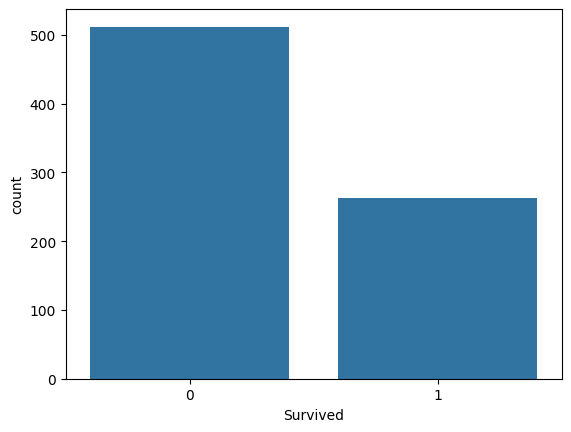

In [15]:
sns.countplot(df,x='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

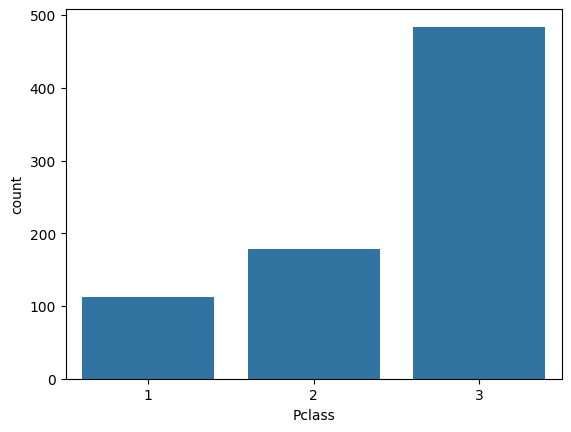

In [16]:
sns.countplot(df,x='Pclass')

<Axes: xlabel='Sex', ylabel='count'>

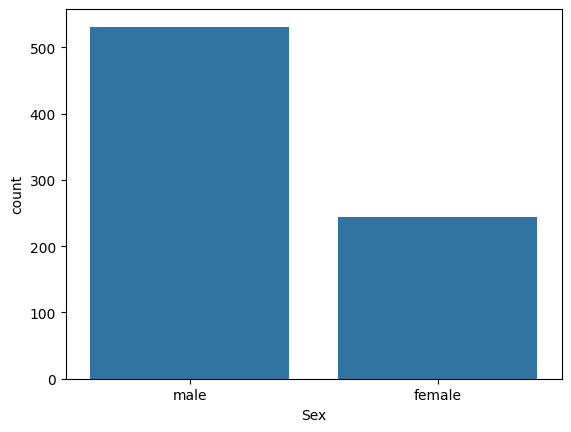

In [17]:
sns.countplot(df, x='Sex')

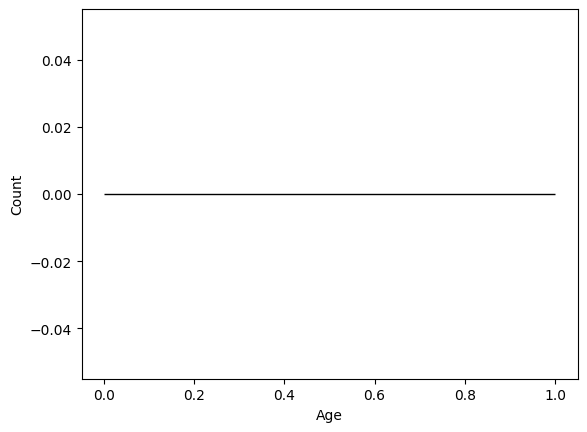

In [18]:
sns.histplot(df, x ='Age')
plt.show()


<Axes: xlabel='Survived', ylabel='count'>

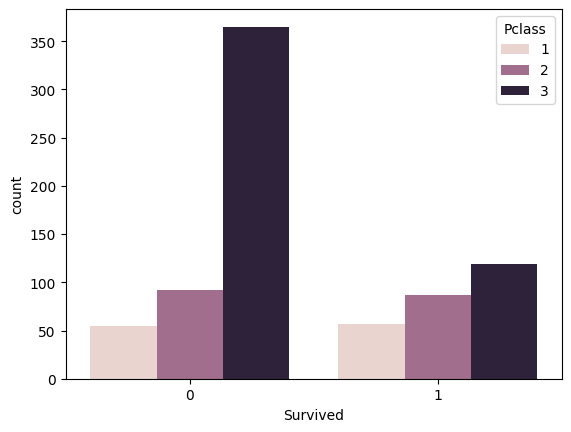

In [19]:
# count of survival w.r.t pclass
sns.countplot(x = df['Survived'], hue = df['Pclass'])

<Axes: xlabel='Survived', ylabel='count'>

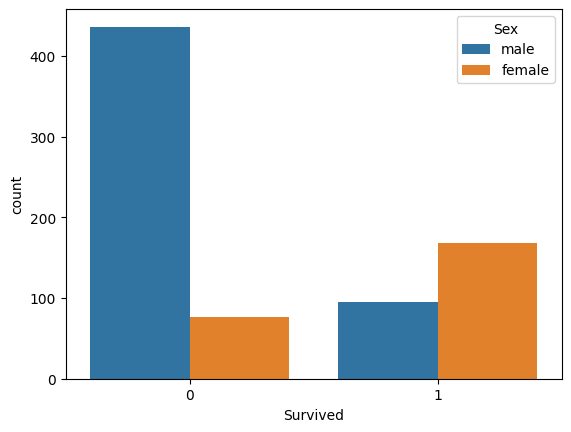

In [20]:
# count of survival w.r.t gender
sns.countplot(x = df['Survived'], hue = df['Sex'])

<Axes: xlabel='Survived', ylabel='count'>

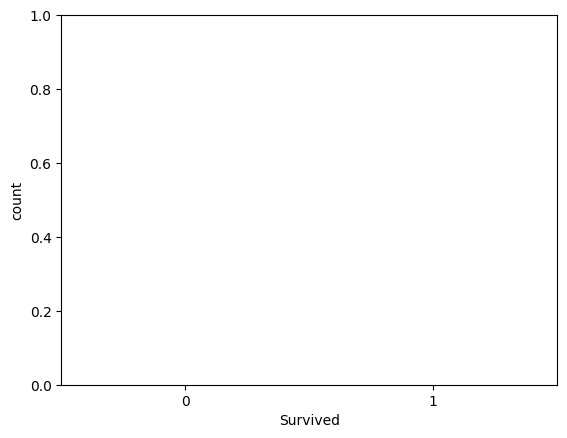

In [21]:
# count of survival w.r.t Age
sns.countplot(x = df['Survived'], hue = df['Age'])

In [22]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,None,1,0,A/5 21171,7.2500,None
2,3,1,3,"Heikkinen, Miss. Laina",female,None,0,0,STON/O2. 3101282,7.9250,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,None,1,0,113803,53.1000,None
4,5,0,3,"Allen, Mr. William Henry",male,None,0,0,373450,8.0500,None
5,6,0,3,"Moran, Mr. James",male,None,0,0,330877,8.4583,None
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,None,0,0,211536,13.0000,None
887,888,1,1,"Graham, Miss. Margaret Edith",female,None,0,0,112053,30.0000,None
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,None,1,2,W./C. 6607,23.4500,None
889,890,1,1,"Behr, Mr. Karl Howell",male,None,0,0,111369,30.0000,None


## Feature Engineering

#### before modeling the data, transform gender(Sex) into numeric
#### Male - 1
#### Female - 0


In [23]:
# Use LabelEncoder from sklearn library
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,None,1,0,A/5 21171,7.2500,None
2,3,1,3,"Heikkinen, Miss. Laina",0,None,0,0,STON/O2. 3101282,7.9250,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,None,1,0,113803,53.1000,None
4,5,0,3,"Allen, Mr. William Henry",1,None,0,0,373450,8.0500,None
5,6,0,3,"Moran, Mr. James",1,None,0,0,330877,8.4583,None


In [25]:
# Now drop unnecessary columns for modeling
df.drop(columns = ["PassengerId","Name","SibSp","Parch","Ticket","Fare","Age", "Embarked"], inplace = True)

In [26]:
df.head()

,Survived,Pclass,Sex
0,0,3,1
2,1,3,0
3,1,1,0
4,0,3,1
5,0,3,1


### Modeling


In [30]:
X = df[['Sex', 'Pclass']]
y = df['Survived']

In [31]:
# Split data into train and test by using sklearn library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


#### Create Training Model

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
log = LogisticRegression()
log.fit(X_train, y_train)


LogisticRegression()

#### Create Prediction Model

In [34]:
pred = log.predict(X_test)
pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0])

In [35]:
# Accuracy Score
print("Accuracy_score :", accuracy_score(y_test, pred))
print("Precision_score :", precision_score(y_test, pred))

print("Matrix :",confusion_matrix(y_test,pred))

Accuracy_score : 0.7741935483870968
Precision_score : 0.7321428571428571
Matrix : [[79 15]
 [20 41]]


In [36]:
y_test

,Survived
428,0
702,0
464,0
15,1
832,0
...,...
547,1
560,0
246,0
677,1


In [37]:
submission=X.iloc[:,:].values
y_final=log.predict(submission)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [38]:
y_final.shape

(775,)

In [39]:
final = pd.DataFrame()
final["Sex"]= X['Sex']
final["survived"]=y_final

In [40]:
final.to_csv("final results.csv",index=False)

#### predict\(\[\[ Pclass, Sex \]\]\) =&gt; survived or not survived

In [41]:

import warnings
warnings.filterwarnings("ignore")

result = log.predict([[1,0]])
if(result == 0):
    print("So sorry, Not Survived")
else:
    print("Survived")

Survived
